Import the needed packages and define some functions and constant values

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from kmodes.kmodes import KModes

repositoryLink = r'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'

def CSVToPandasDataFrame(pathFileName, delimiter, low_memory=False):
    data = pd.read_csv(pathFileName, sep=delimiter, low_memory=low_memory)
    return pd.DataFrame(data)

def getDays(date1,date2, dateFormat):
    date1 = datetime.strptime(date1, dateFormat)
    date2 = datetime.strptime(date2, dateFormat)
    return (date2 - date1).days

Read HR data

In [35]:
fileName = 'HR_people_analytics.csv'
HRData = CSVToPandasDataFrame(
    pathFileName = repositoryLink + fileName, 
    delimiter=','
)

Exploring the data

In [36]:
HRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [37]:
HRData.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


Display distinct values and counts for each column

In [38]:
for col in HRData:
    print(f'{col}: {HRData[col].nunique()} {HRData[col].count()}')

Employee_Name: 311 311
EmpID: 311 311
MarriedID: 2 311
MaritalStatusID: 5 311
GenderID: 2 311
EmpStatusID: 5 311
DeptID: 6 311
PerfScoreID: 4 311
FromDiversityJobFairID: 2 311
Salary: 308 311
Termd: 2 311
PositionID: 30 311
Position: 32 311
State: 28 311
Zip: 158 311
DOB: 307 311
Sex: 2 311
MaritalDesc: 5 311
CitizenDesc: 3 311
HispanicLatino: 4 311
RaceDesc: 6 311
DateofHire: 101 311
DateofTermination: 96 104
TermReason: 18 311
EmploymentStatus: 3 311
Department: 6 311
ManagerName: 21 311
ManagerID: 23 303
RecruitmentSource: 9 311
PerformanceScore: 4 311
EngagementSurvey: 119 311
EmpSatisfaction: 5 311
SpecialProjectsCount: 9 311
LastPerformanceReview_Date: 137 311
DaysLateLast30: 7 311
Absences: 20 311


Drop the columns that have distinct values count equal or near total count

In [39]:
HRData.drop(['Employee_Name', 'EmpID', 'Zip', 'ManagerName', 'ManagerID'], axis=1, inplace=True)

Drop DOB because the dates are corrupted 

In [40]:
HRData['DOB']
HRData.drop(['DOB'], axis=1, inplace=True)

Drop sex because there is genderID

In [41]:
HRData[['Sex', 'GenderID']]
HRData.drop(['Sex'], axis=1, inplace=True)

In [42]:
for col in HRData:
    print(f'Column {col} Distinct Values: \n {HRData[col].unique()}')

Column MarriedID Distinct Values: 
 [0 1]
Column MaritalStatusID Distinct Values: 
 [0 1 2 4 3]
Column GenderID Distinct Values: 
 [1 0]
Column EmpStatusID Distinct Values: 
 [1 5 3 4 2]
Column DeptID Distinct Values: 
 [5 3 4 1 6 2]
Column PerfScoreID Distinct Values: 
 [4 3 2 1]
Column FromDiversityJobFairID Distinct Values: 
 [0 1]
Column Salary Distinct Values: 
 [ 62506 104437  64955  64991  50825  57568  95660  59365  47837  50178
  54670  47211  92328  58709  52505  57834  70131  59026 110000  53250
  51044  64919  62910  66441  57815 103613 106367  74312  53492  63000
  65288  64375  74326  63763  62162  77692  72640  93396  52846 100031
  71860  61656 110929  54237  60380  66808  64786  64816  68678  64066
  59369  50373  63108  59144  68051 170500  63381  83552  56149  92329
  65729  85028  57583  56294  56991  55722 101199  61568  58275  53189
  96820  51259  59231  61584  46335  70621 138888  74241  75188  62514
  60070  48888  54285  56847  60340  59124  99280  71776  6590

Convert HispanicLatino values ['No' 'Yes' 'no' 'yes'] to binary [0, 1]

In [43]:
HRData['HispanicLatino'] = HRData['HispanicLatino'].replace({'No': 0, 'no': 0, 'Yes': 1, 'yes': 1})
print(f"HispanicLatino values: {HRData['HispanicLatino'].unique()}")

HispanicLatino values: [0 1]


Calculate the no of days of employment based on DateofHire, DateofTermination, and Termd columns

In [44]:
HRData['EmploymentDays'] = HRData.apply(lambda row: getDays(row['DateofHire'], row['DateofTermination'], '%m/%d/%Y') if row['Termd'] == 1 else getDays(row['DateofHire'], '01/01/2020', '%m/%d/%Y') , axis=1)
HRData[['DateofHire','DateofTermination', 'EmploymentDays']]

#LastPerformanceReview_Days 
HRData['LastPerformanceReview_Days'] = HRData['LastPerformanceReview_Date'].apply(lambda x: getDays(x, '01/01/2020', '%m/%d/%Y'))

Categorizing 

In [45]:
#salary
bins =  [HRData['Salary'].min(), HRData['Salary'].max()/2, HRData['Salary'].max(), float('inf')]
labels = [1, 2, 3]
HRData['SalaryCategory'] = pd.cut(HRData['Salary'], bins=bins, labels=labels, include_lowest=True)

#EmploymentDays
bins =  [HRData['EmploymentDays'].min(), HRData['EmploymentDays'].max()/2, HRData['EmploymentDays'].max(), float('inf')]
labels = [1, 2, 3]
HRData['EmploymentDaysCategory'] = pd.cut(HRData['EmploymentDays'], bins=bins, labels=labels, include_lowest=True)

#EngagementSurvey
bins =  [HRData['EngagementSurvey'].min(), HRData['EngagementSurvey'].max()/2, HRData['EngagementSurvey'].max(), float('inf')]
labels = [1, 2, 3]
HRData['EngagementSurveyCategory'] = pd.cut(HRData['EngagementSurvey'], bins=bins, labels=labels, include_lowest=True)

#LastPerformanceReview_Days
bins =  [HRData['LastPerformanceReview_Days'].min(), HRData['LastPerformanceReview_Days'].max()/2, HRData['LastPerformanceReview_Days'].max(), float('inf')]
labels = [1, 2, 3]
HRData['LastPerformanceReviewCategory'] = pd.cut(HRData['LastPerformanceReview_Days'], bins=bins, labels=labels, include_lowest=True)

Drop unneeded columns after categorizing process

In [46]:
HRData.drop(['Salary', 'EmploymentDays', 'EngagementSurvey', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Days', 'LastPerformanceReview_Date'], axis=1, inplace=True)

The data is cleaned and categorized

In [47]:
for col in HRData:
    print(f'Column {col} Distinct Values: \n {HRData[col].unique()}')

Column MarriedID Distinct Values: 
 [0 1]
Column MaritalStatusID Distinct Values: 
 [0 1 2 4 3]
Column GenderID Distinct Values: 
 [1 0]
Column EmpStatusID Distinct Values: 
 [1 5 3 4 2]
Column DeptID Distinct Values: 
 [5 3 4 1 6 2]
Column PerfScoreID Distinct Values: 
 [4 3 2 1]
Column FromDiversityJobFairID Distinct Values: 
 [0 1]
Column Termd Distinct Values: 
 [0 1]
Column PositionID Distinct Values: 
 [19 27 20 24 14  9  8 30 26 18  1  3 25  5 10 28 21  4 13 15 12 11  2 16
 22 23 29  7 17  6]
Column Position Distinct Values: 
 ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assi

K-Modes Clustering

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 115, cost: 2484.0
Run 1, iteration: 2/100, moves: 7, cost: 2484.0
Init: initializing centroids


Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 37, cost: 2472.0
Run 2, iteration: 2/100, moves: 10, cost: 2465.0
Run 2, iteration: 3/100, moves: 1, cost: 2465.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 51, cost: 2508.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 41, cost: 2445.0
Run 4, iteration: 2/100, moves: 3, cost: 2444.0
Run 4, iteration: 3/100, moves: 0, cost: 2444.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 35, cost: 2413.0
Best run was number 5
Cluster Centroids:
[['0' '1' '0' '5' '5' '3' '0' '1' '19' 'Production Technician I' 'MA'
  'Married' 'US Citizen' '0' 'White' 'Another position'
  'Voluntarily Terminated' 'Production       ' 'Google Search'
  'Fully Meets' '4' '0' '0' '16' '1' '1' '2' '2']
 ['0' '0' '0' '1' '5' '3' '0' '0' '19' '

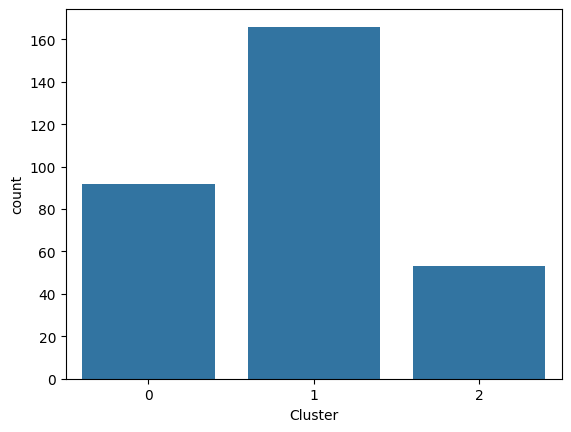

In [48]:
k = 3  
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(HRData)
HRData['Cluster'] = clusters
print("Cluster Centroids:")
print(km.cluster_centroids_)
sns.countplot(x='Cluster', data=HRData)
plt.show()

View the results in CSV file "HR-Analysis-Clusters.csv"

In [50]:
HRData.to_csv(r'HR-Analysis-Clusters.csv', sep='|', index=False) 